# Pakage
import basic package

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")


# Dataset

## Download

In [ ]:
import os
if not os.path.isfile('dunnhumby-the-complete-journey.zip'):
  ! gdown 1IJi61EmP6nXQ1V-aaIPujgawXcjTRRRU

Downloading...
From: https://drive.google.com/uc?id=1IJi61EmP6nXQ1V-aaIPujgawXcjTRRRU
To: /content/dunnhumby-the-complete-journey.zip
100% 128M/128M [00:01<00:00, 101MB/s]


## Extract

In [ ]:
import zipfile

# Path to the zip file
zip_file_path = 'dunnhumby-the-complete-journey.zip'

# Directory to extract the files
extract_to_dir = 'dunnhumby-the-complete-journey/'

# Extract the files from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

   household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   
3           2375  26984851472    1     1082185         1         1.21   
4           2375  26984851472    1     8160430         1         1.50   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  
0       364        -0.60        1631        1          0.0                0.0  
1       364         0.00        1631        1          0.0                0.0  
2       364        -0.30        1631        1          0.0                0.0  
3       364         0.00        1631        1          0.0                0.0  
4       364        -0.39        1631        1          0.0                0.0  


## Load

In [ ]:
# Create an empty dictionary to store the dataframes
dfs = {}

# Walk through the directory and read each CSV file into the dictionary
for dirname, _, filenames in os.walk(extract_to_dir):
    for filename in filenames:
        if filename.endswith('.csv'):  # Ensure only CSV files are read
            # Construct the full file path
            file_path = os.path.join(dirname, filename)
            # Extract the name of the dataframe from the filename
            df_name = filename.split('.')[0]
            # Read the CSV file and assign it to the dictionary with its name as the key
            dfs[df_name] = pd.read_csv(file_path)

In [ ]:
# Example: Display the first few rows of the transaction data
dfs['transaction_data'].head()


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


# Exploratory Data Analysis
The dataset consist of eight tables in separate .csv files. The dataset covers a two year span purchase transactions of 2500 households. Also demographics information of households, campaign and coupon redemption informations are available. In the modeling phase we will join these tables to make our final dataset.

* Campaign Descriptions (campaigndesc.csv)
* Campaigns (campaign_table.csv)
* Coupons (coupon.csv)
* Coupon Redemptions (coupon_redempt.csv)
* Transactions (transaction_data.csv)
* Demographics (hh_demographic.csv)

## Campaign Descriptions
Campaign description data is a look up table, containing the start and the end days of each campaign (30 campaigns in total). Also it gives which campaign belongs to what category (Type A, B and C).

In [ ]:
dfs["campaign_desc"]

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684
5,TypeB,21,624,656
6,TypeB,22,624,656
7,TypeA,18,587,642
8,TypeB,19,603,635
9,TypeB,17,575,607


### Each Campaign Duration
Let's calculate and visualise how long each campaign lasted within two years period:

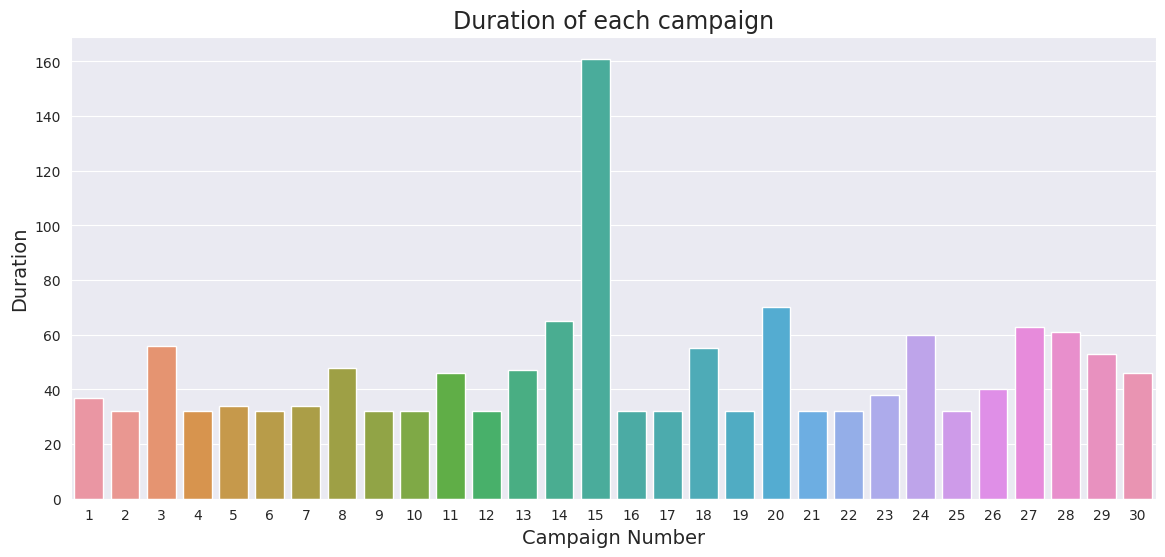

In [ ]:
dfs["campaign_desc"]["DUR"] = dfs["campaign_desc"].END_DAY-dfs["campaign_desc"].START_DAY
fig = plt.figure(figsize=(14,6))
sns.barplot(x="CAMPAIGN",y="DUR",data=dfs["campaign_desc"],orient="v",
            order=dfs["campaign_desc"].sort_values(by="CAMPAIGN").CAMPAIGN.values)
plt.title('Duration of each campaign', fontsize=17)
plt.xlabel('Campaign Number', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.show()

Campaign No:15 lasts the longest with a staggering 160 days figure, where other campaigns are fairly close to each other ranging from 30 to 70 days
Average campaign duration is 37 days (median)

### Campaign Dataset
Campaign dataset contains identifying information for the marketing campaigns each household participated in.

In [ ]:
dfs["campaign_table"]

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26
...,...,...,...
7203,TypeC,1803,15
7204,TypeC,1082,15
7205,TypeC,942,15
7206,TypeC,855,15


In [ ]:
total_households = 2500
len(dfs["campaign_table"].household_key.unique())

1584

Out of 2500 households, 1584 of them received a campaign once, the rest never received a campaign.

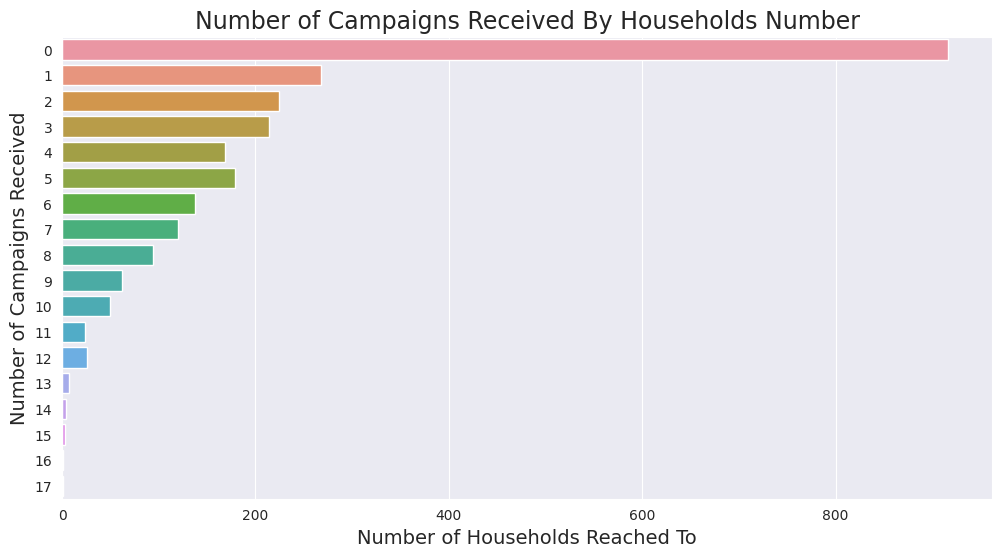

In [ ]:
no_of_received_campaigns_per_house = dfs["campaign_table"].household_key.value_counts()
no_of_received_campaigns = no_of_received_campaigns_per_house.value_counts()
no_of_received_campaigns[0] = total_households-len(no_of_received_campaigns_per_house)
no_of_received_campaigns = pd.DataFrame(list(zip(no_of_received_campaigns.index,no_of_received_campaigns))
                                        ,columns=["Number of Campaigns Received",
                                                  "Number of Households Reached To"]).sort_values(
                                                                                            by="Number of Campaigns Received",ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=no_of_received_campaigns,orient="h",order=no_of_received_campaigns["Number of Campaigns Received"])
plt.title('Number of Campaigns Received By Households Number', fontsize=17)
plt.xlabel('Number of Households Reached To', fontsize=14)
plt.ylabel('Number of Campaigns Received', fontsize=14)
plt.show()

On the other side, a very small portion of the households received double-digit number of campaigns. We will investigate how this will effect churn rates in the following sections. The barchart up groups the households and shows counts of the group populations.